In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# STEPS.
# 1. Read all the 3 files.
# 2. Merge all the 3 files into one.
# 3. Do Exploratory Data Analysis
# 4. Get unique Genres
# 5. Convert categorical data to numeric data, so it can be processed by ml algorithm. Here, convert Genre and Gender to numeric.
# 6. Build a Model to predict user rating : Rating is categorical data with values 1,2,3,4,5. So, we use Logistic Regression.
# 7. Define X and y. X is independent variables and y is the dependent variable ie Rating.
# 8. Random split the data into train and test.
# 9. First train the model using train data.
# 10. Test the model using test data.
# 11. Compare Actual rating and predicted rating.
# 12. Determine the accuracy score of the model.

In [3]:
# Read the movies data.
movies_df = pd.read_csv('movies.dat',delimiter="::",names=['Id','Name','Genre'])

<ipython-input-3-782062a2ff26>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies_df = pd.read_csv('movies.dat',delimiter="::",names=['Id','Name','Genre'])


In [4]:
movies_df

,Id,Name,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [5]:
ratings_df = pd.read_csv('ratings.dat',delimiter="::",names=['UserId','MovieId','Rating','TimeStamp'])

<ipython-input-5-4afdea0d42c8>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings_df = pd.read_csv('ratings.dat',delimiter="::",names=['UserId','MovieId','Rating','TimeStamp'])


In [6]:
ratings_df

,UserId,MovieId,Rating,TimeStamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [7]:
users_df = pd.read_csv('users.dat',delimiter='::',names=['Id','Gender','Age Range','Occupation Category','ZipCode'])

<ipython-input-7-fbada724dc00>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users_df = pd.read_csv('users.dat',delimiter='::',names=['Id','Gender','Age Range','Occupation Category','ZipCode'])


In [8]:
users_df

,Id,Gender,Age Range,Occupation Category,ZipCode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [9]:
# Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. 
#  (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId
movie_ratings_df = movies_df.merge(ratings_df, left_on='Id', right_on='MovieId')
master_df = movie_ratings_df.merge(users_df,left_on='UserId', right_on='Id')

In [10]:
master_df = master_df[['Name','Genre','UserId','MovieId','Rating','TimeStamp','Gender','Age Range','Occupation Category','ZipCode']]
master_df

,Name,Genre,UserId,MovieId,Rating,TimeStamp,Gender,Age Range,Occupation Category,ZipCode
0,Toy Story (1995),Animation|Children's|Comedy,1,1,5,978824268,F,1,10,48067
1,Pocahontas (1995),Animation|Children's|Musical|Romance,1,48,5,978824351,F,1,10,48067
2,Apollo 13 (1995),Drama,1,150,5,978301777,F,1,10,48067
3,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,260,4,978300760,F,1,10,48067
4,Schindler's List (1993),Drama|War,1,527,5,978824195,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000204,Rules of Engagement (2000),Drama|Thriller,5727,3513,4,958489970,M,25,4,92843
1000205,American Psycho (2000),Comedy|Horror|Thriller,5727,3535,2,958489970,M,25,4,92843
1000206,Keeping the Faith (2000),Comedy|Romance,5727,3536,5,958489902,M,25,4,92843
1000207,U-571 (2000),Action|Thriller,5727,3555,3,958490699,M,25,4,92843


In [11]:
#Explore the datasets using visual representations (graphs or tables) EDA

master_df.groupby('Gender').count()

,Name,Genre,UserId,MovieId,Rating,TimeStamp,Age Range,Occupation Category,ZipCode
Gender,,,,,,,,,
F,246440,246440,246440,246440,246440,246440,246440,246440,246440
M,753769,753769,753769,753769,753769,753769,753769,753769,753769


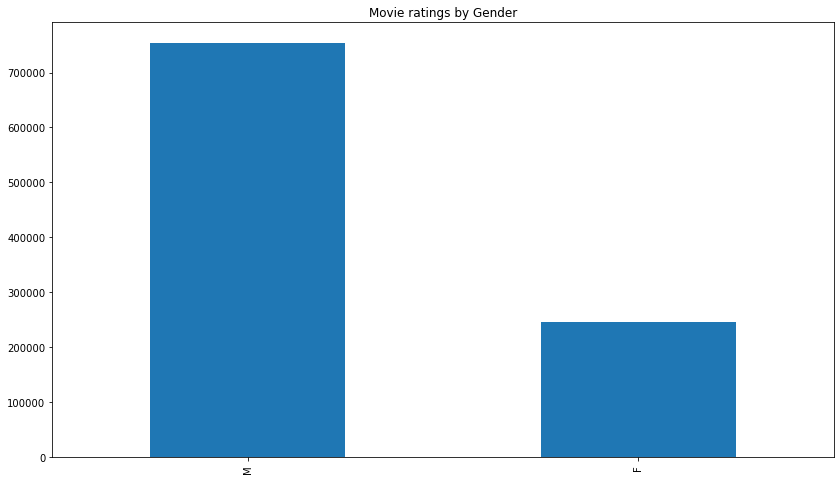

In [12]:
# EDA 1 - Movie ratings by Gender
a = master_df['Gender'].value_counts().plot(kind='bar',
                                    figsize=(14,8), title='Movie ratings by Gender')


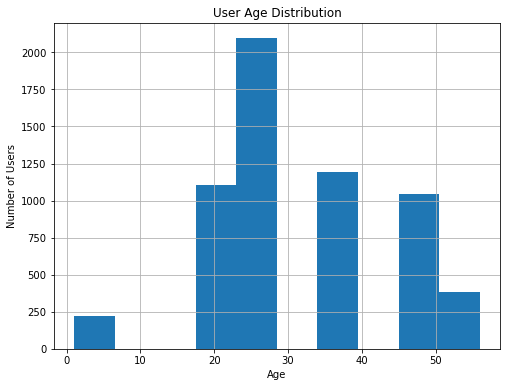

In [13]:
# EDA 2 User Age Distribution
plt.figure(figsize=(8,6))
users_df['Age Range'].hist()
plt.title('User Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

Text(0, 0.5, 'Number of Users')

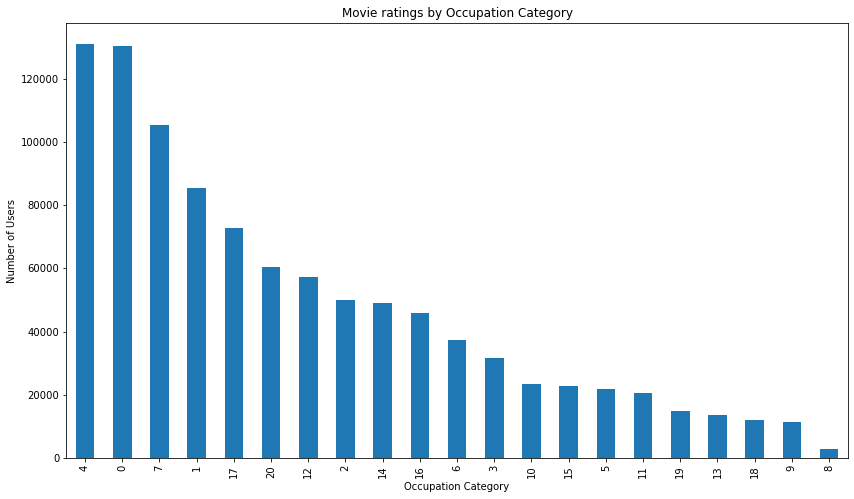

In [14]:
# EDA 3 - Movie ratings by OCcupation
master_df['Occupation Category'].value_counts().plot(kind='bar',
                                    figsize=(14,8),title='Movie ratings by Occupation Category')
plt.xlabel('Occupation Category')
plt.ylabel('Number of Users')


Text(0, 0.5, 'Number of Users')

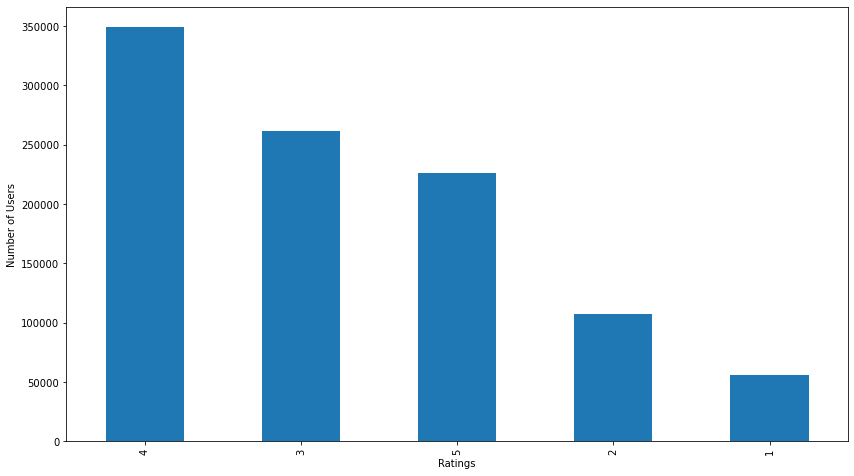

In [15]:
# EDA 4 - Ratings by Users
master_df['Rating'].value_counts().plot(kind='bar',
                                    figsize=(14,8),title='')
plt.xlabel('Ratings')
plt.ylabel('Number of Users')

<AxesSubplot:title={'center':'Movie ratings for Toy Story'}>

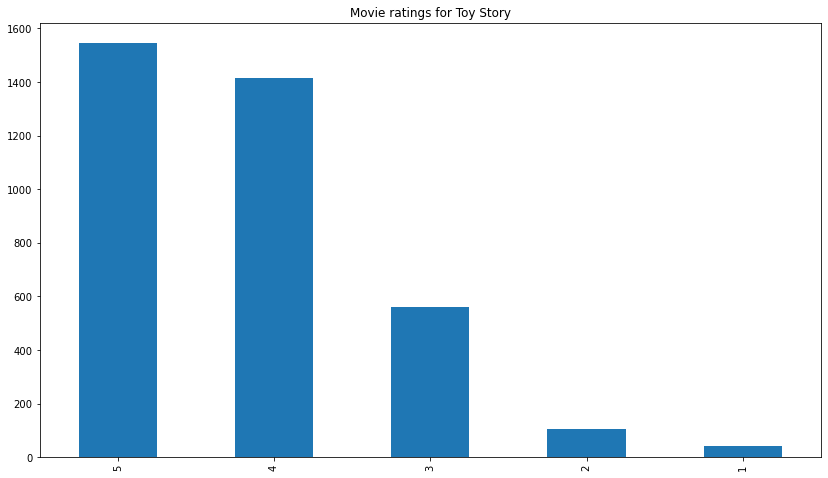

In [16]:
# EDA 5 - User rating of the movie “Toy Story”
ts_df = master_df[master_df['Name'].str.contains('Toy Story')]
ts_df['Rating'].value_counts().plot(kind='bar',
                                    figsize=(14,8), title='Movie ratings for Toy Story')


In [17]:
# Mean user rating for Toy Story
ts_df['Rating'].mean()

4.17804478427089

In [18]:
# EDA 6 - Top 25 movies by viewership rating
moviesByRating = master_df.groupby(['Name'])['Rating'].mean()
moviesByRating.sort_values(ascending=False).head(25)

Name
Ulysses (Ulisse) (1954)                                                5.000000
Lured (1947)                                                           5.000000
Follow the Bitch (1998)                                                5.000000
Bittersweet Motel (2000)                                               5.000000
Song of Freedom (1936)                                                 5.000000
One Little Indian (1973)                                               5.000000
Smashing Time (1967)                                                   5.000000
Schlafes Bruder (Brother of Sleep) (1995)                              5.000000
Gate of Heavenly Peace, The (1995)                                     5.000000
Baby, The (1973)                                                       5.000000
I Am Cuba (Soy Cuba/Ya Kuba) (1964)                                    4.800000
Lamerica (1994)                                                        4.750000
Apple, The (Sib) (1998)            

In [19]:
#EDA 7 - Most rated movies 
moviesByRatingCount = master_df.groupby(['Name'])['Rating'].count()
moviesByRatingCount.sort_values(ascending=False).head(25)

Name
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pri

In [20]:
# EDA 8 - Find the ratings for all the movies reviewed by for a particular user of user id = 2696
ratingsByUser = master_df[master_df['UserId'] == 2696].sort_values(by='Rating',ascending=False)
print('Number of ratings by userId 2696:', ratingsByUser['UserId'].count())
ratingsByUser

Number of ratings by userId 2696: 20


,Name,Genre,UserId,MovieId,Rating,TimeStamp,Gender,Age Range,Occupation Category,ZipCode
991036,Lone Star (1996),Drama|Mystery,2696,800,5,973308842,M,25,7,24210
991045,"Devil's Advocate, The (1997)",Crime|Horror|Mystery|Thriller,2696,1645,4,973308904,M,25,7,24210
991047,Palmetto (1998),Film-Noir|Mystery|Thriller,2696,1783,4,973308865,M,25,7,24210
991037,Basic Instinct (1992),Mystery|Thriller,2696,1092,4,973308886,M,25,7,24210
991053,"Talented Mr. Ripley, The (1999)",Drama|Mystery|Thriller,2696,3176,4,973308865,M,25,7,24210
991039,"Shining, The (1980)",Horror,2696,1258,4,973308710,M,25,7,24210
991051,Psycho (1998),Crime|Horror|Thriller,2696,2389,4,973308710,M,25,7,24210
991049,"Perfect Murder, A (1998)",Mystery|Thriller,2696,1892,4,973308904,M,25,7,24210
991042,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,2696,1617,4,973308842,M,25,7,24210
991043,"Game, The (1997)",Mystery|Thriller,2696,1625,4,973308842,M,25,7,24210


In [21]:
# Find out all the unique genres 
genre_df = master_df['Genre'].drop_duplicates().str.split('|',expand=True)
oneCol = []
for x in range(len(genre_df.columns)):
    oneCol.append(genre_df[x])
uniqueGenres = pd.concat(oneCol, ignore_index=True)
uniqueGenres = uniqueGenres.dropna().unique()
uniqueGenres

array(['Animation', 'Drama', 'Action', "Children's", 'Crime', 'Musical',
       'Adventure', 'Comedy', 'Romance', 'Thriller', 'Western',
       'Documentary', 'Sci-Fi', 'Horror', 'Film-Noir', 'Mystery', 'War',
       'Fantasy'], dtype=object)

In [22]:
# Convert Categorical to numeric data.
Genre = master_df['Genre'].str.get_dummies().add_prefix('Genres_')
Genre


,Genres_Action,Genres_Adventure,Genres_Animation,Genres_Children's,Genres_Comedy,Genres_Crime,Genres_Documentary,Genres_Drama,Genres_Fantasy,Genres_Film-Noir,Genres_Horror,Genres_Musical,Genres_Mystery,Genres_Romance,Genres_Sci-Fi,Genres_Thriller,Genres_War,Genres_Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1000205,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
1000206,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1000207,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [23]:
# Drop the existing Genre (Categorical) and add the new Genre(numeric data) to the master_df.
master_df = pd.concat(
    [master_df.drop(
        ['Genre'],
        axis=1
    ),
     Genre],
    axis=1,
   
)


In [24]:
# Convert Gender from categorical M/F to numeric 0/1.
master_df = pd.get_dummies(
    master_df,
    columns=['Gender']
)

In [25]:
# Show all columns
pd.set_option('display.max_columns', None)

master_df.head()


,Name,UserId,MovieId,Rating,TimeStamp,Age Range,Occupation Category,ZipCode,Genres_Action,Genres_Adventure,Genres_Animation,Genres_Children's,Genres_Comedy,Genres_Crime,Genres_Documentary,Genres_Drama,Genres_Fantasy,Genres_Film-Noir,Genres_Horror,Genres_Musical,Genres_Mystery,Genres_Romance,Genres_Sci-Fi,Genres_Thriller,Genres_War,Genres_Western,Gender_F,Gender_M
0,Toy Story (1995),1,1,5,978824268,1,10,48067,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,Pocahontas (1995),1,48,5,978824351,1,10,48067,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
2,Apollo 13 (1995),1,150,5,978301777,1,10,48067,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,Star Wars: Episode IV - A New Hope (1977),1,260,4,978300760,1,10,48067,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
4,Schindler's List (1993),1,527,5,978824195,1,10,48067,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0


In [26]:
# Find the correlation for Rating.
correlation_matrix = master_df.corr()
correlation_matrix['Rating']

UserId                 0.012303
MovieId               -0.064042
Rating                 1.000000
TimeStamp             -0.026770
Age Range              0.056869
Occupation Category    0.006753
Genres_Action         -0.047633
Genres_Adventure      -0.036718
Genres_Animation       0.019670
Genres_Children's     -0.039829
Genres_Comedy         -0.039622
Genres_Crime           0.033446
Genres_Documentary     0.028098
Genres_Drama           0.122561
Genres_Fantasy        -0.023312
Genres_Film-Noir       0.060259
Genres_Horror         -0.094353
Genres_Musical         0.015643
Genres_Mystery         0.015848
Genres_Romance         0.009644
Genres_Sci-Fi         -0.044487
Genres_Thriller       -0.004806
Genres_War             0.075688
Genres_Western         0.007311
Gender_F               0.019861
Gender_M              -0.019861
Name: Rating, dtype: float64

In [27]:
master_df.columns

Index(['Name', 'UserId', 'MovieId', 'Rating', 'TimeStamp', 'Age Range',
       'Occupation Category', 'ZipCode', 'Genres_Action', 'Genres_Adventure',
       'Genres_Animation', 'Genres_Children's', 'Genres_Comedy',
       'Genres_Crime', 'Genres_Documentary', 'Genres_Drama', 'Genres_Fantasy',
       'Genres_Film-Noir', 'Genres_Horror', 'Genres_Musical', 'Genres_Mystery',
       'Genres_Romance', 'Genres_Sci-Fi', 'Genres_Thriller', 'Genres_War',
       'Genres_Western', 'Gender_F', 'Gender_M'],
      dtype='object')

In [28]:
# Build a Model to predict user rating : 
# Define X (independent variables) and Y (dependent variable)
X = master_df[['Age Range', 'Occupation Category',
       'Genres_Action', 'Genres_Adventure', 'Genres_Animation',
       'Genres_Children\'s', 'Genres_Comedy', 'Genres_Crime',
       'Genres_Documentary', 'Genres_Drama', 'Genres_Fantasy',
       'Genres_Film-Noir', 'Genres_Horror', 'Genres_Musical', 'Genres_Mystery',
       'Genres_Romance', 'Genres_Sci-Fi', 'Genres_Thriller', 'Genres_War',
       'Genres_Western', 'Gender_F', 'Gender_M']]
y = master_df['Rating']

In [29]:
X

,Age Range,Occupation Category,Genres_Action,Genres_Adventure,Genres_Animation,Genres_Children's,Genres_Comedy,Genres_Crime,Genres_Documentary,Genres_Drama,Genres_Fantasy,Genres_Film-Noir,Genres_Horror,Genres_Musical,Genres_Mystery,Genres_Romance,Genres_Sci-Fi,Genres_Thriller,Genres_War,Genres_Western,Gender_F,Gender_M
0,1,10,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,10,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
2,1,10,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,1,10,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
4,1,10,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,25,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1000205,25,4,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
1000206,25,4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1000207,25,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [30]:
X.shape

(1000209, 22)

In [31]:
# 'random' split data in train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state= 100)

# 80% in train
# 20% data in test

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800167, 22)
(200042, 22)
(800167,)
(200042,)


In [33]:
X_train.head()

,Age Range,Occupation Category,Genres_Action,Genres_Adventure,Genres_Animation,Genres_Children's,Genres_Comedy,Genres_Crime,Genres_Documentary,Genres_Drama,Genres_Fantasy,Genres_Film-Noir,Genres_Horror,Genres_Musical,Genres_Mystery,Genres_Romance,Genres_Sci-Fi,Genres_Thriller,Genres_War,Genres_Western,Gender_F,Gender_M
692311,18,20,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1
720165,18,10,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
352534,25,7,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
556643,25,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
848048,25,19,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [34]:
y_train.head()

692311    5
720165    2
352534    3
556643    3
848048    3
Name: Rating, dtype: int64

In [35]:
X_test.head()

,Age Range,Occupation Category,Genres_Action,Genres_Adventure,Genres_Animation,Genres_Children's,Genres_Comedy,Genres_Crime,Genres_Documentary,Genres_Drama,Genres_Fantasy,Genres_Film-Noir,Genres_Horror,Genres_Musical,Genres_Mystery,Genres_Romance,Genres_Sci-Fi,Genres_Thriller,Genres_War,Genres_Western,Gender_F,Gender_M
802987,50,20,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
700292,50,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
439922,45,7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
747897,25,12,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
907129,18,4,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [36]:
# Check if All dtypes are numeric, so they can be processed by ml algorithm.
X_train.dtypes

Age Range              int64
Occupation Category    int64
Genres_Action          int64
Genres_Adventure       int64
Genres_Animation       int64
Genres_Children's      int64
Genres_Comedy          int64
Genres_Crime           int64
Genres_Documentary     int64
Genres_Drama           int64
Genres_Fantasy         int64
Genres_Film-Noir       int64
Genres_Horror          int64
Genres_Musical         int64
Genres_Mystery         int64
Genres_Romance         int64
Genres_Sci-Fi          int64
Genres_Thriller        int64
Genres_War             int64
Genres_Western         int64
Gender_F               uint8
Gender_M               uint8
dtype: object

In [37]:
y_test.head()

802987    2
700292    3
439922    4
747897    1
907129    3
Name: Rating, dtype: int64

In [38]:
# Rating is categorical data with values 1,2,3,4,5. So, we use Logistic Regression.
from sklearn.linear_model import LogisticRegression

lm = LogisticRegression()
logreg = LogisticRegression(max_iter=100000)

lm.fit(X_train, y_train)   # training

C:\Users\srivi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
# predict the movie rating on test data
prediction = lm.predict(X_test)

In [40]:
prediction

array([4, 4, 5, ..., 4, 4, 4], dtype=int64)

In [41]:
y_test

802987    2
700292    3
439922    4
747897    1
907129    3
         ..
584268    3
538959    1
350303    4
336914    4
258733    4
Name: Rating, Length: 200042, dtype: int64

In [42]:
test = pd.DataFrame({'Predicted':prediction, 'Actual' :y_test})

In [43]:
# Print the accuracy score.
from sklearn import metrics
metrics.accuracy_score(y_test,prediction)

0.3493666330070685

In [44]:
test.head(30)

,Predicted,Actual
802987,4,2
700292,4,3
439922,5,4
747897,4,1
907129,4,3
120599,4,4
603381,4,5
729459,4,2
826172,4,3
977361,4,3


# Conclusion: The accuracy score is 35%, Which indicates that the model is far from accurate. 